In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# make dataframe to start gathering insights
games = pd.read_csv('data\games_cleaned.csv')
games.head()

,time_control,moves,date,time_format,colour,my_rating,opponent_rating,opponent,outcome,my_accuracy,opponent_accuracy,rating_difference
0,10+0,62,2020-12-06,Rapid,White,557,356,methburger682,W,42.3,57.6,201
1,10+0,40,2020-12-09,Rapid,Black,643,438,JimenaGallardo,W,64.7,77.7,205
2,10+0,25,2020-12-09,Rapid,Black,531,577,DanielBrown1974,L,58.3,76.4,-46
3,10+0,64,2020-12-09,Rapid,White,625,615,RRR0007,W,81.4,77.5,10
4,10+0,12,2020-12-10,Rapid,White,564,639,prune131,L,31.6,55.5,-75


In [3]:
# fix data types and check data types and nulls
games.date = pd.to_datetime(games.date, format = '%Y-%m-%d')
games.moves = games.moves.astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9605 entries, 0 to 9604
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_control       9605 non-null   object        
 1   moves              9605 non-null   int32         
 2   date               9605 non-null   datetime64[ns]
 3   time_format        9605 non-null   object        
 4   colour             9605 non-null   object        
 5   my_rating          9605 non-null   int64         
 6   opponent_rating    9605 non-null   int64         
 7   opponent           9605 non-null   object        
 8   outcome            9605 non-null   object        
 9   my_accuracy        9605 non-null   float64       
 10  opponent_accuracy  9605 non-null   float64       
 11  rating_difference  9605 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(5)
memory usage: 863.1+ KB


In [4]:
games.head()

,time_control,moves,date,time_format,colour,my_rating,opponent_rating,opponent,outcome,my_accuracy,opponent_accuracy,rating_difference
0,10+0,62,2020-12-06,Rapid,White,557,356,methburger682,W,42.3,57.6,201
1,10+0,40,2020-12-09,Rapid,Black,643,438,JimenaGallardo,W,64.7,77.7,205
2,10+0,25,2020-12-09,Rapid,Black,531,577,DanielBrown1974,L,58.3,76.4,-46
3,10+0,64,2020-12-09,Rapid,White,625,615,RRR0007,W,81.4,77.5,10
4,10+0,12,2020-12-10,Rapid,White,564,639,prune131,L,31.6,55.5,-75


## Rating development in Rapid v Blitz over my career

#### Rating development for Rapid and Blitz is similar in the first year, but is much more consistent for Rapid in the second year. This is because Rapid games are longer and so it is easier to play well and improve your peak rating!

Text(0, 0.5, 'Rating')

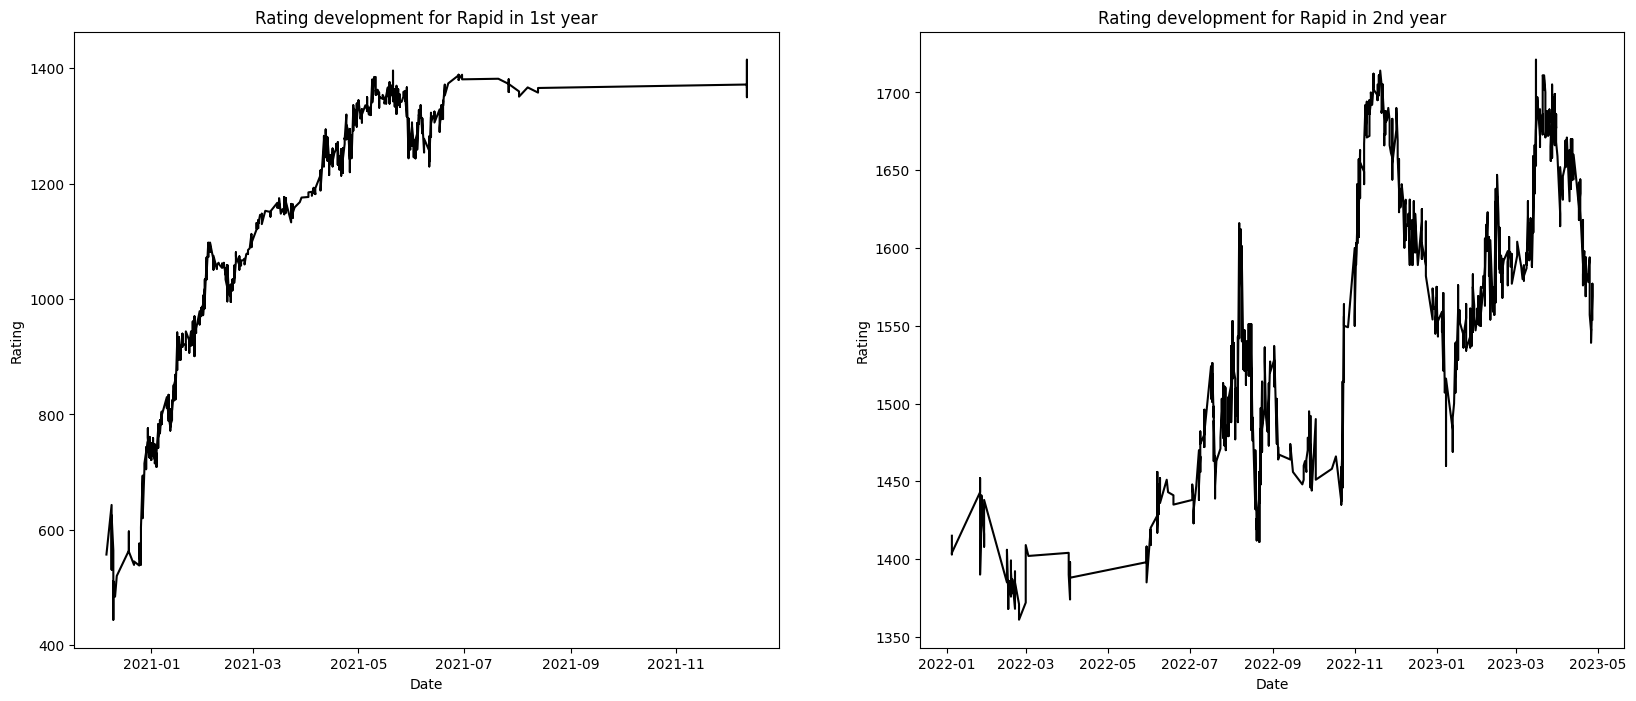

In [5]:
beginner_games = games[(games.date.dt.year == 2020) | (games.date.dt.year == 2021)]
intermediate_games = games[(games.date.dt.year == 2022) | (games.date.dt.year == 2023)]


plt.figure(figsize = (20,8))

# Rapid
ax = plt.subplot(1,2,1)

plt.plot(beginner_games[beginner_games.time_format == 'Rapid'].date,
         beginner_games[beginner_games.time_format == 'Rapid'].my_rating,
         color = 'Black')

ax.set_title('Rating development for Rapid in 1st year')
ax.set_xlabel('Date')
ax.set_ylabel('Rating')

ax2 = plt.subplot(1,2,2)

plt.plot(intermediate_games[intermediate_games.time_format == 'Rapid'].date,
         intermediate_games[intermediate_games.time_format == 'Rapid'].my_rating,
         color = 'Black')

ax2.set_title('Rating development for Rapid in 2nd year')
ax2.set_xlabel('Date')
ax2.set_ylabel('Rating')

#### Much more sporadic rating development in Blitz in the second year, many peaks and lows which come and go. This happens because one can play 20 blitz games in a day and gain/lose 100 elo points in such a span, so it is easier for the blitz rating to fluctuate.

Text(0, 0.5, 'Rating')

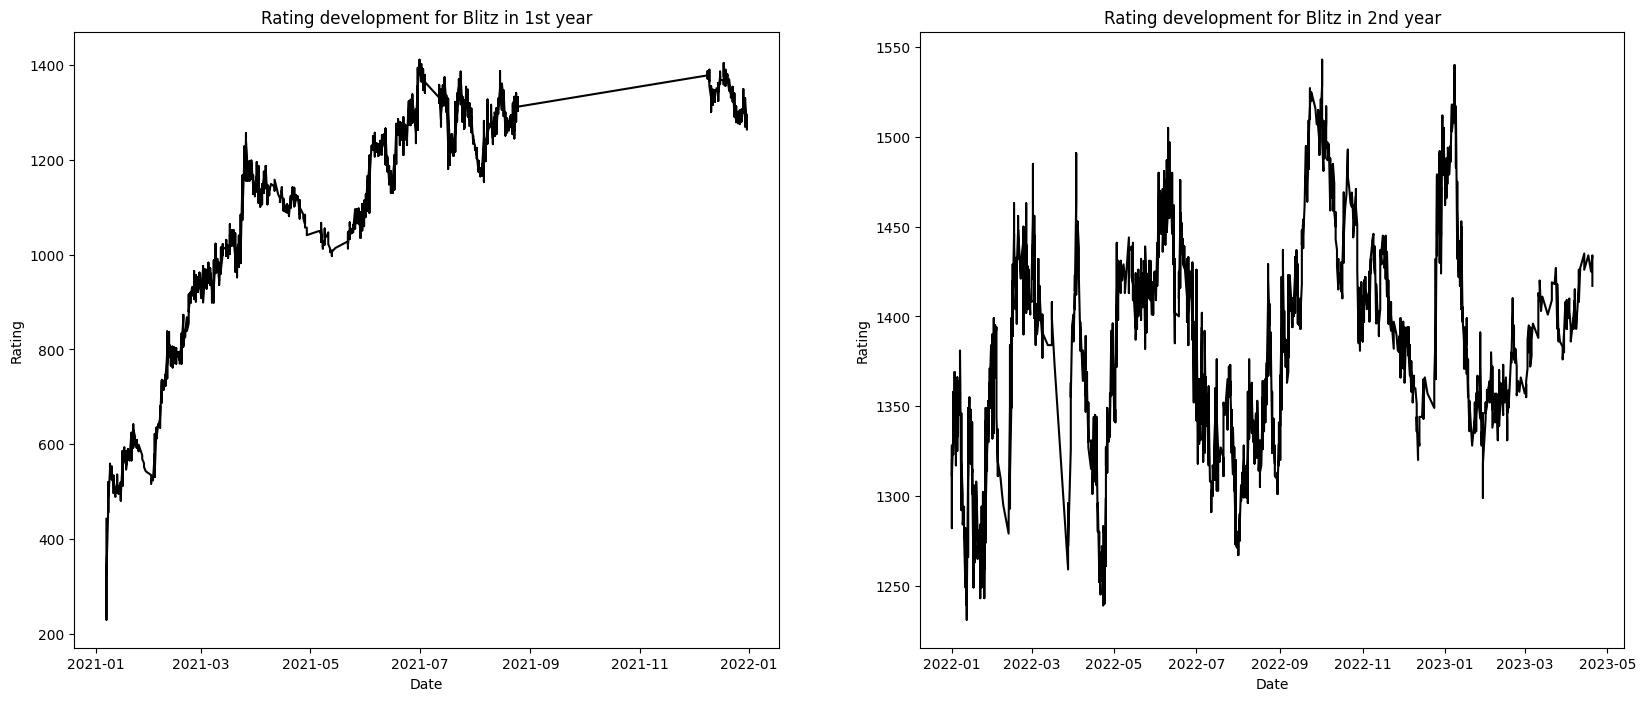

In [6]:
plt.figure(figsize = (20,8))

# Blitz
ax = plt.subplot(1,2,1)

plt.plot(beginner_games[beginner_games.time_format == 'Blitz'].date,
         beginner_games[beginner_games.time_format == 'Blitz'].my_rating,
         color = 'Black')

ax.set_title('Rating development for Blitz in 1st year')
ax.set_xlabel('Date')
ax.set_ylabel('Rating')

ax2 = plt.subplot(1,2,2)

plt.plot(intermediate_games[intermediate_games.time_format == 'Blitz'].date,
         intermediate_games[intermediate_games.time_format == 'Blitz'].my_rating,
         color = 'Black')

ax2.set_title('Rating development for Blitz in 2nd year')
ax2.set_xlabel('Date')
ax2.set_ylabel('Rating')

### How many Wins, Losses, and Draws do I have?

<Axes: title={'center': 'Wins, Losses and Draws'}, xlabel='outcome', ylabel='count'>

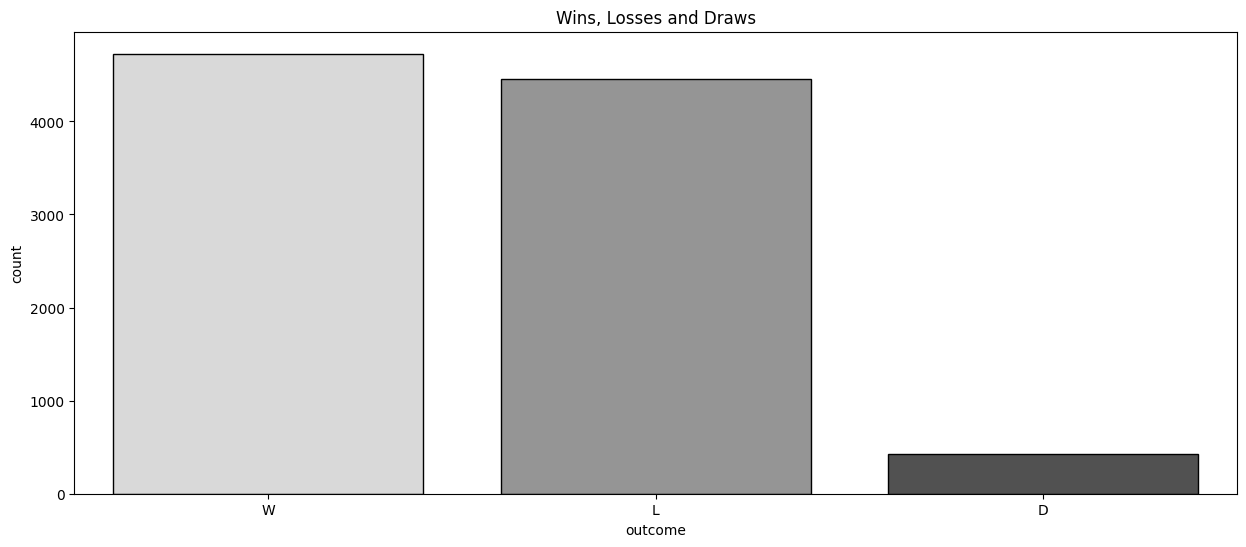

In [7]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Wins, Losses and Draws")
sns.countplot(data=games, x='outcome', palette="Greys", edgecolor="black")

### How about Wins, losses and draws by colour? It seems pretty consistent over both colours, although I have slightly more wins with the white pieces, as one expects.

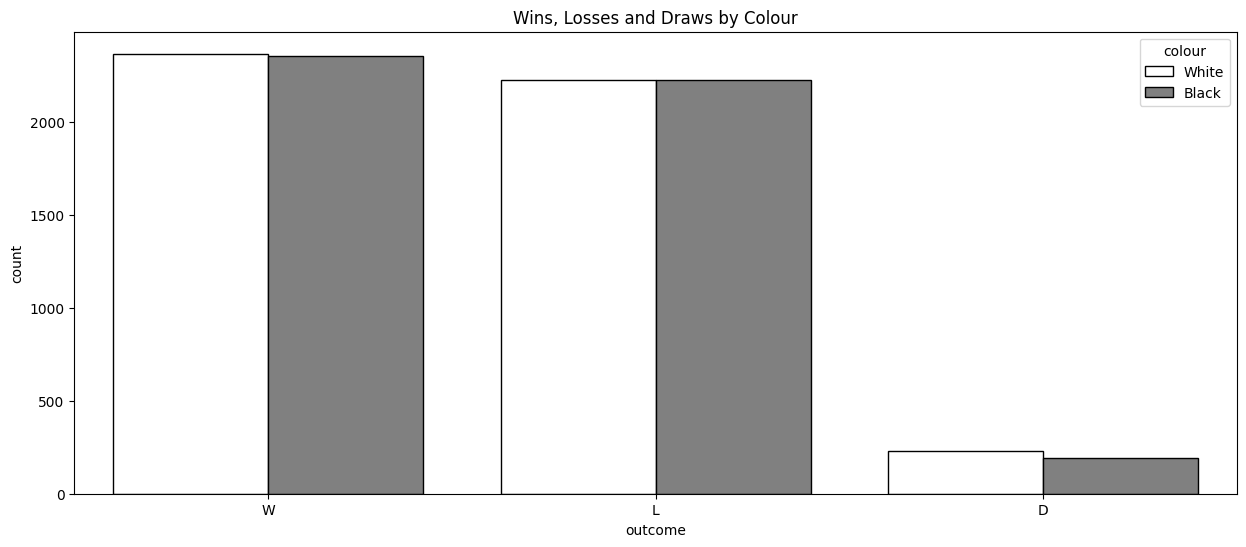

In [8]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Wins, Losses and Draws by Colour")
sns.countplot(data=games, x='outcome', hue="colour", palette={"Black": "Grey", "White": "White"}, edgecolor="black");

### Let's see if there are any correlations between the numeric columns!

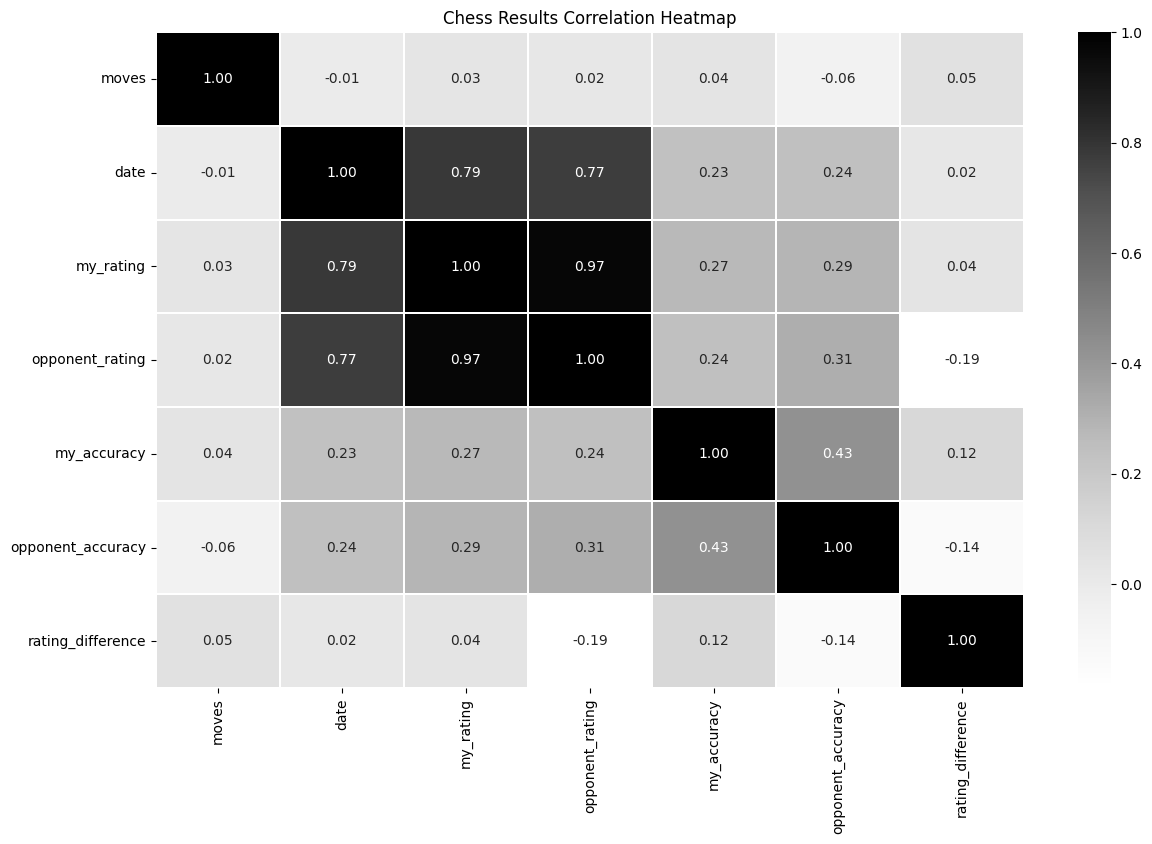

In [9]:
corr = games.drop(columns = ['time_control', 'time_format', 'colour', 'opponent', 'outcome']).corr()
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
sns.heatmap(corr, cmap="Greys", annot=True, fmt='.2f', linewidths=.05, ax=ax).set_title("Chess Results Correlation Heatmap")
fig.subplots_adjust(top=0.93)

## Number of moves distribution

(array([ 229., 1389., 2749., 2322., 1396.,  876.,  408.,  163.,   65.,
           8.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80., 100., 120.]),
 <BarContainer object of 10 artists>)

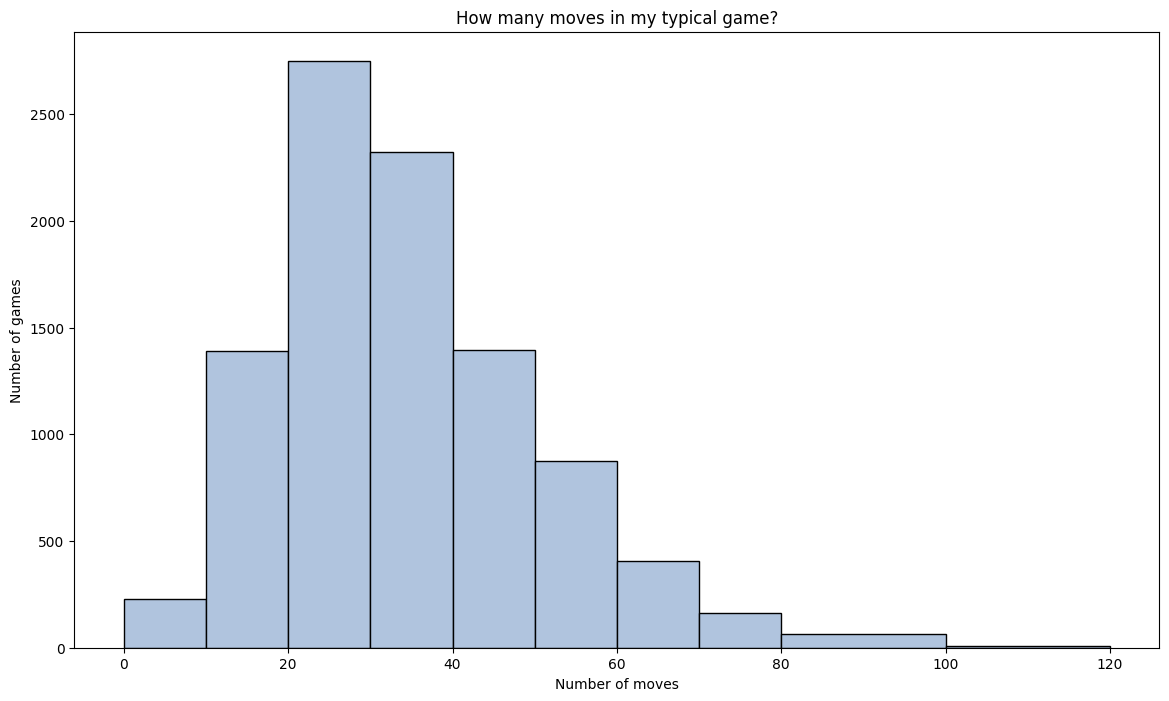

In [10]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 100, 120]
ax.set_title("How many moves in my typical game?")
ax.set_xlabel('Number of moves')
ax.set_ylabel('Number of games')
plt.hist(games.moves, bins = bins, color = 'lightsteelblue', edgecolor = 'black')

Looks like the number of moves is slightly right-skewed. This is expected as games can go on for more than 60 moves, but it is not likely to end in less than 20 moves, unless there is a spectacular blunder! It should be noted that most games do end before 80 moves and games with more than 80 moves are definitely extreme examples and can be considered outliers.

## Does the amount of moves affect my play?

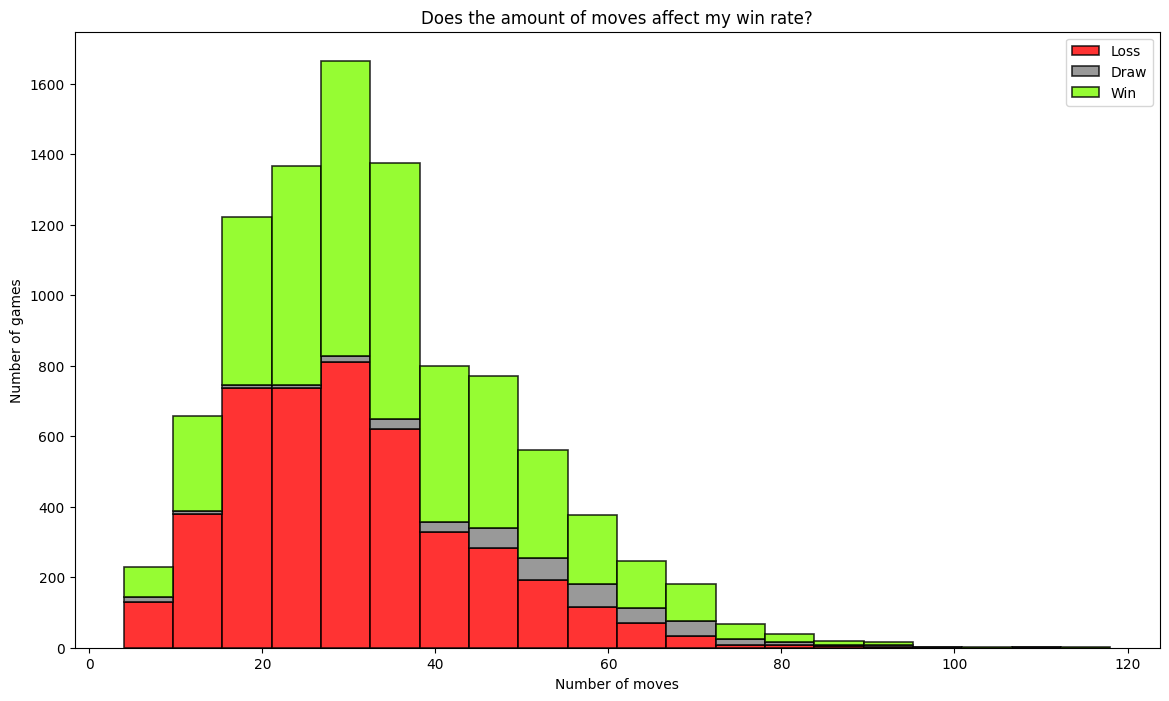

In [11]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("Does the amount of moves affect my win rate?")

# separate the data by color
loss_moves = games.loc[games["outcome"] == "L", "moves"]
draw_moves = games.loc[games["outcome"] == "D", "moves"]
win_moves = games.loc[games["outcome"] == "W", "moves"]

# create the histogram
plt.hist([loss_moves, draw_moves, win_moves],
         bins=20,
         stacked=True,
         color=["red", "gray", "lawngreen"],
         label=["Loss", "Draw", "Win"],
         edgecolor='black',
         linewidth=1.2,
         alpha = 0.8)

# set the title and labels
plt.title("Does the amount of moves affect my win rate?")
plt.xlabel("Number of moves")
plt.ylabel("Number of games")
#ax.patch.set_facecolor('#c3d9ff')
#fig.set_facecolor('#c3d9ff')

# add the legend
plt.legend()

It seems that my win rate increases as the number of moves increases, but I tend to suffer if the number of moves is less than 30. This suggests I am *prone to making early game blunders* which make me lose the game early on!

In [12]:
grouped_df = games.groupby(['outcome', pd.cut(games['moves'], 10)])
grouped_df = grouped_df.size().unstack().transpose()

total_games = grouped_df['W'] + grouped_df['L'] + grouped_df['D']
total_wins = grouped_df['W']

grouped_df["Win Rate %"] = round((total_wins / total_games) * 100, 0)
grouped_df

outcome,D,L,W,Win Rate %
moves,,,,
"(3.886, 15.4]",25,508,354,40.0
"(15.4, 26.8]",17,1473,1098,42.0
"(26.8, 38.2]",46,1430,1564,51.0
"(38.2, 49.6]",86,610,874,56.0
"(49.6, 61.0]",132,320,533,54.0
"(61.0, 72.4]",80,91,211,55.0
"(72.4, 83.8]",24,17,65,61.0
"(83.8, 95.2]",9,7,21,57.0
"(95.2, 106.6]",1,0,4,80.0


**As suspected, the less the number of move,s the less my win rate, which suggests I need to make better moves right out of the opening!**

## How much does rating difference affect my play?

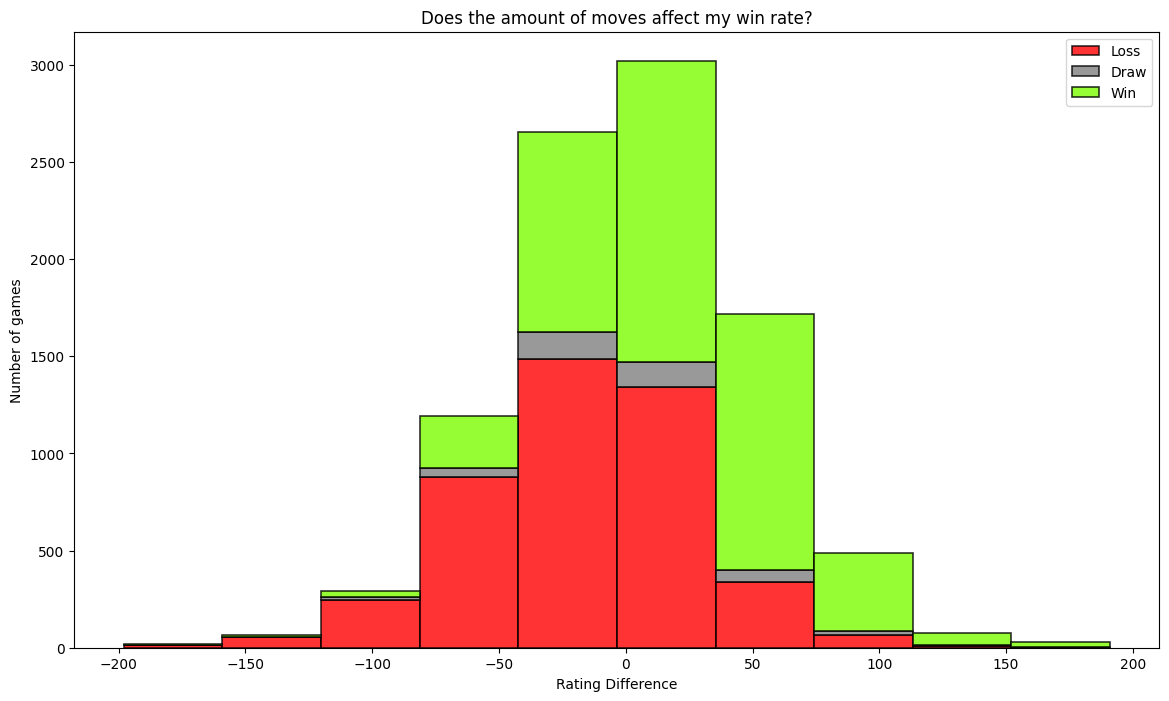

In [13]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
ax.set_title("How much does rating difference affect my win rate?")

# remove extreme rating difference values, where I have potentially played games with friends
rating_diff_df = games.loc[(games['rating_difference'] <= 200) & (games['rating_difference'] >= -200)]

# separate the data by color
loss_rating_diff = rating_diff_df.loc[(rating_diff_df["outcome"] == "L"), "rating_difference"]
draw_rating_diff = rating_diff_df.loc[(rating_diff_df["outcome"] == "D"), "rating_difference"]
win_rating_diff = rating_diff_df.loc[(rating_diff_df["outcome"] == "W"), "rating_difference"]

# create the histogram
plt.hist([loss_rating_diff, draw_rating_diff, win_rating_diff],
         bins=10,
         stacked=True,
         color=["red", "gray", "lawngreen"],
         label=["Loss", "Draw", "Win"],
         edgecolor='black',
         linewidth=1.2,
         alpha = 0.8)

# set the title and labels
plt.title("Does the amount of moves affect my win rate?")
plt.xlabel("Rating Difference")
plt.ylabel("Number of games")

# show legend
plt.legend()

As suspected by intuition, the larger the rating difference, the more I tend to win / lose. It seems that I suffer a lot when my rating is around 50-100 points less than my opponent **this is an area I need to improve upon!**

## Do I perform differently in different time controls?

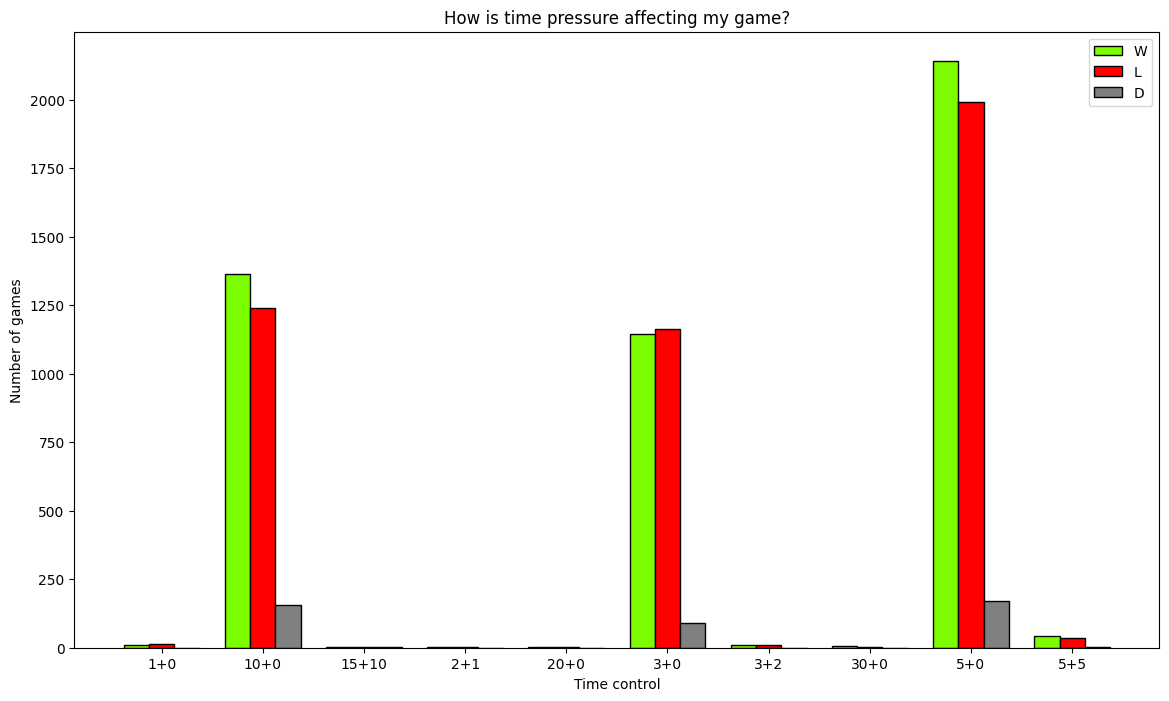

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.title("How is time pressure affecting my game?")

# Set up the data
time_data = games['time_control']
result_data = games['outcome']

# Set up the color palette
palette = {"W": "lawngreen", "L": "red", "D": "gray"}

# Create the countplot
unique_times = sorted(time_data.unique())
width = 0.25  # Width of each bar
offsets = np.arange(len(unique_times))  # X-axis offsets for each group of bars

for i, result in enumerate(['W', 'L', 'D']):
    result_counts = []
    for time in unique_times:
        count = len(games[(time_data == time) & (result_data == result)])
        result_counts.append(count)
    
    ax.bar(offsets + i * width, result_counts, width=width, color=palette[result], edgecolor="black", label=result)

# Set the x-axis ticks and labels
ax.set_xticks(offsets + width)
ax.set_xticklabels(unique_times)

# Set the x-axis label
ax.set_xlabel("Time control")

# Set the y-axis label
ax.set_ylabel("Number of games")

# Add legend
ax.legend()

It looks like I suffer more losses than I do win in 3+0 matches. This is due to many reasons. It is the most easibly accessible time format. One can play it in the morning, night, at the doctor's office or even waiting for your turn at the golf course. Due to the lack of concentration, one tends to perform worse in this time format!

## How has my accuracy changed from my beginner games to intermediate games?

Number of games played in 1st half of career: 5208 
Number of games played in 2nd half of career: 4397


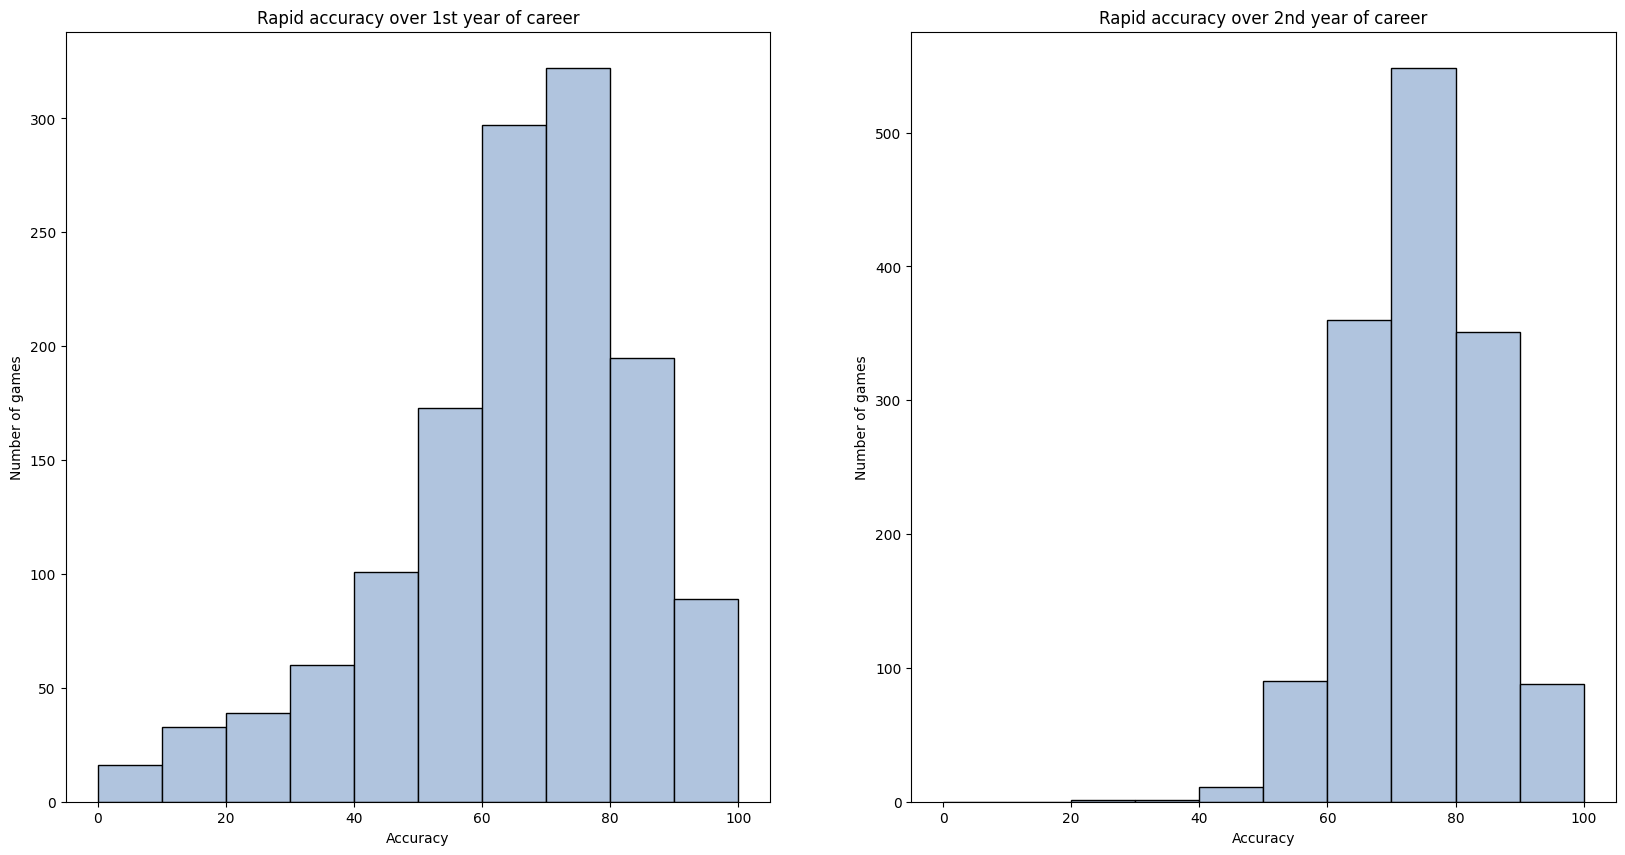

In [15]:
fig = plt.figure(figsize=(20,10))
bins = [0,10,20,30,40,50,60,70,80,90,100]

ax = plt.subplot(1,2,1)
plt.hist(beginner_games[beginner_games.time_format == 'Rapid'].my_accuracy,
         bins = bins,
         color = 'lightsteelblue',
         edgecolor = 'black')
ax.set_title('Rapid accuracy over 1st year of career')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Number of games')

ax2 = plt.subplot(1,2,2)
plt.hist(intermediate_games[intermediate_games.time_format == 'Rapid'].my_accuracy,
         bins = bins,
         color = 'lightsteelblue',
         edgecolor = 'black')
ax2.set_title('Rapid accuracy over 2nd year of career')
ax2.set_xlabel('Accuracy')
ax2.set_ylabel('Number of games')

print(f"Number of games played in 1st half of career: {len(beginner_games)} \nNumber of games played in 2nd half of career: {len(intermediate_games)}")


One can see that I have much less games that are below 60% accuracy in my 2nd year, indicating a clear improvement. There is also a significant increase in the number of games above 80% accuracy!

## What about in Blitz?

Text(0, 0.5, 'Number of games')

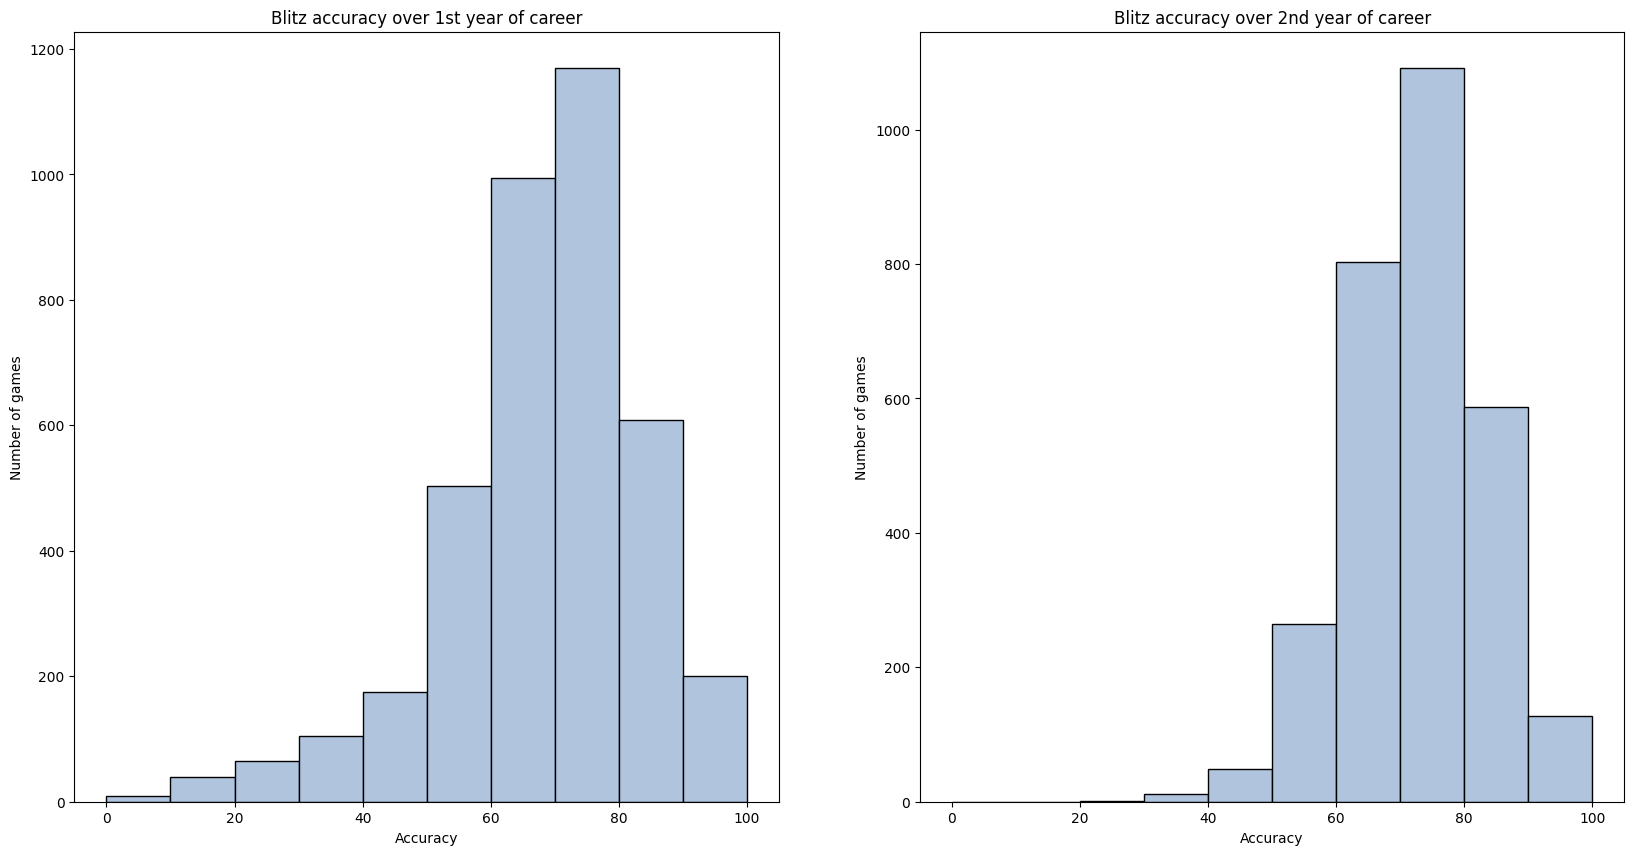

In [16]:
fig = plt.figure(figsize=(20,10))
bins = [0,10,20,30,40,50,60,70,80,90,100]

ax = plt.subplot(1,2,1)
plt.hist(beginner_games[beginner_games.time_format == 'Blitz'].my_accuracy,
         bins = bins,
         color = 'lightsteelblue',
         edgecolor = 'black')
ax.set_title('Blitz accuracy over 1st year of career')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Number of games')

ax2 = plt.subplot(1,2,2)
plt.hist(intermediate_games[intermediate_games.time_format == 'Blitz'].my_accuracy,
         bins = bins,
         color = 'lightsteelblue',
         edgecolor = 'black')
ax2.set_title('Blitz accuracy over 2nd year of career')
ax2.set_xlabel('Accuracy')
ax2.set_ylabel('Number of games')

Looks like my very low accuracy games have decreased in my second year, but the higher accuracy games have not increased a lot from my beginner games!

How has my accuracy trended over the years in comparison with my opponent?

In [17]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
years = ['2021', '2022', '2023']

my_acc = dict()
opp_acc = dict()
for year in years:
    my_acc[year] = dict()
    opp_acc[year] = dict()
    for month in months:
        # extract my_accuracy for each month of the year
        my_monthly_acc = games[(games['date'].dt.year == int(year)) & (games['date'].dt.month == int(month))]['my_accuracy']
        opp_monthly_acc = games[(games['date'].dt.year == int(year)) & (games['date'].dt.month == int(month))]['opponent_accuracy']
        # calculate average accuracy for the month
        average_accuracy = my_monthly_acc.mean()
        opp_average_accuracy = opp_monthly_acc.mean()
        my_acc[year][month] = average_accuracy
        opp_acc[year][month] = opp_average_accuracy

print(my_acc)
print(opp_acc)

{'2021': {'01': 59.36023166023166, '02': 63.524909747292426, '03': 66.54199475065617, '04': 67.3813953488372, '05': 70.1015113350126, '06': 70.59628712871287, '07': 69.99294670846395, '08': 69.69599303135888, '09': nan, '10': nan, '11': nan, '12': 72.51232876712328}, '2022': {'01': 72.6940499040307, '02': 72.11572052401745, '03': 73.27403846153847, '04': 71.56754385964912, '05': 72.04301075268818, '06': 72.82996941896025, '07': 73.44031830238727, '08': 74.09594594594594, '09': 73.184375, '10': 73.89860465116278, '11': 73.76213991769546, '12': 73.52565055762082}, '2023': {'01': 73.12568807339449, '02': 74.026953125, '03': 74.72488888888888, '04': 73.36959459459459, '05': nan, '06': nan, '07': nan, '08': nan, '09': nan, '10': nan, '11': nan, '12': nan}}
{'2021': {'01': 58.07895752895753, '02': 60.82833935018051, '03': 66.44527559055118, '04': 68.6087656529517, '05': 69.50831234256927, '06': 69.35173267326734, '07': 70.11786833855798, '08': 70.35522648083624, '09': nan, '10': nan, '11': n

In [18]:
# Remove months '05' to '12' from '2023'
my_acc['2023'] = {month: accuracy for month, accuracy in my_acc['2023'].items() if month < '05'}
opp_acc['2023'] = {month: accuracy for month, accuracy in opp_acc['2023'].items() if month < '05'}

# Impute each month with the average of the previous three months
for year in ['2021', '2022']:
    for month in months:
        if my_acc[year][month] is None or pd.isna(my_acc[year][month]):
            previous_months = [str(int(month)-i).zfill(2) for i in range(1, 4) if str(int(month)-i).zfill(2) in my_acc[year]]
            if previous_months:
                average_accuracy = sum(my_acc[year][prev_month] for prev_month in previous_months) / len(previous_months)
                my_acc[year][month] = average_accuracy

# Impute each month with the average of the previous three months
for year in ['2021', '2022']:
    for month in months:
        if opp_acc[year][month] is None or pd.isna(opp_acc[year][month]):
            previous_months = [str(int(month)-i).zfill(2) for i in range(1, 4) if str(int(month)-i).zfill(2) in opp_acc[year]]
            if previous_months:
                average_accuracy = sum(opp_acc[year][prev_month] for prev_month in previous_months) / len(previous_months)
                opp_acc[year][month] = average_accuracy

print(my_acc)
print(opp_acc)


{'2021': {'01': 59.36023166023166, '02': 63.524909747292426, '03': 66.54199475065617, '04': 67.3813953488372, '05': 70.1015113350126, '06': 70.59628712871287, '07': 69.99294670846395, '08': 69.69599303135888, '09': 70.09507562284524, '10': 69.92800512088935, '11': 69.90635792503116, '12': 72.51232876712328}, '2022': {'01': 72.6940499040307, '02': 72.11572052401745, '03': 73.27403846153847, '04': 71.56754385964912, '05': 72.04301075268818, '06': 72.82996941896025, '07': 73.44031830238727, '08': 74.09594594594594, '09': 73.184375, '10': 73.89860465116278, '11': 73.76213991769546, '12': 73.52565055762082}, '2023': {'01': 73.12568807339449, '02': 74.026953125, '03': 74.72488888888888, '04': 73.36959459459459}}
{'2021': {'01': 58.07895752895753, '02': 60.82833935018051, '03': 66.44527559055118, '04': 68.6087656529517, '05': 69.50831234256927, '06': 69.35173267326734, '07': 70.11786833855798, '08': 70.35522648083624, '09': 69.94160916422051, '10': 70.13823466120492, '11': 70.14502343542055, 

C:\Users\zains\AppData\Local\Temp\ipykernel_58864\2237585515.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation=45)


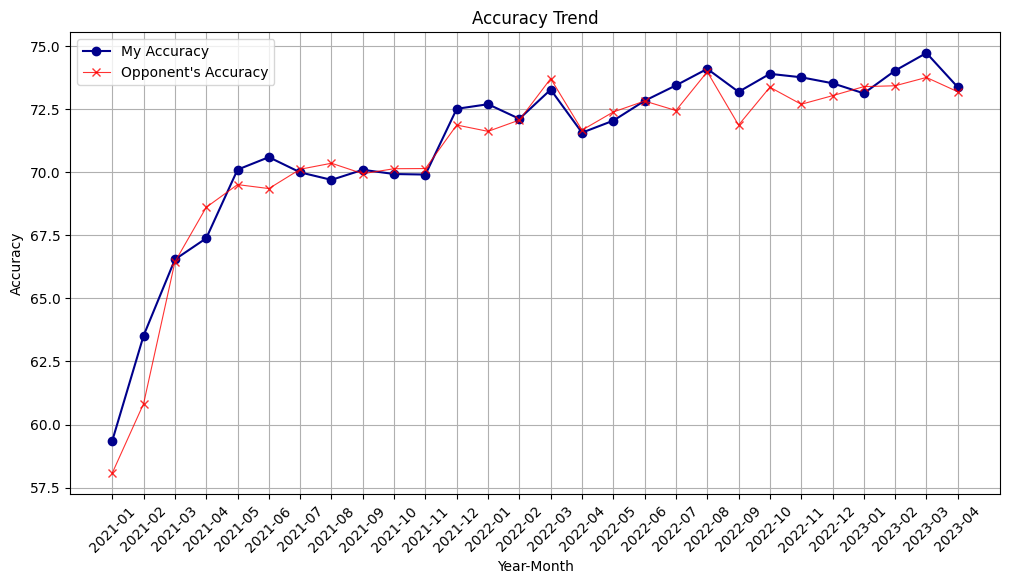

In [19]:
import matplotlib.pyplot as plt

# Extract the x-axis labels and accuracies for your data
x_labels = []
y_values = []
for year, monthly_acc in my_acc.items():
    for month, accuracy in monthly_acc.items():
        x_labels.append(year + '-' + month)
        y_values.append(accuracy)

# Extract the x-axis labels and accuracies for your opponent's data
opponent_y_values = []
for year, monthly_acc in opp_acc.items():
    for month, accuracy in monthly_acc.items():
        opponent_y_values.append(accuracy)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot your accuracy
ax.plot(x_labels,
        y_values,
        marker='o',
        color='darkblue',
        label='My Accuracy')

# Plot your opponent's accuracy
ax.plot(x_labels,
        opponent_y_values,
        marker='x',
        color='red',
        linewidth=0.8,
        alpha=0.8,
        label="Opponent's Accuracy")

# Customize the plot
ax.set_xlabel('Year-Month')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Trend')
ax.set_xticklabels(x_labels, rotation=45)
ax.grid(True)
ax.legend()

# Display the plot
plt.show()

Looks like there was a massive increase between January 2021 and May 2021, and then another one from November 2021 till January 2022. Since then, it has been up and down but a slight increase has been noted.

## Final thoughts

Looks like I need to stop playing Blitz at 3am, and start focusing on the early middlegame, which is where most of my errors seem to be!